In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from pyod.models.knn import KNN
import matplotlib.cm as cm
import seaborn as sns
from kneed import KneeLocator
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv('../data/rock_music.csv')
dataset.set_index('name', inplace=True)
dataset

,artist,release_date,duration,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,hit
name,,,,,,,,,,,,,,,,
Smells Like Teen Spirit,Nirvana,1991,5.03,74,0.502,0.000025,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720,1
Stairway to Heaven - Remaster,Led Zeppelin,1971,8.05,78,0.338,0.580000,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197,1
Bohemian Rhapsody - Remastered 2011,Queen,1975,5.91,74,0.392,0.288000,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228,1
Imagine - Remastered 2010,John Lennon,1971,3.13,77,0.547,0.907000,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169,1
(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.71,77,0.723,0.038300,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,3.56,47,0.296,0.005910,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4,0.406,0
Cellophane,King Gizzard & The Lizard Wizard,2014,3.18,44,0.432,0.002130,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4,0.357,0
Hot Water,King Gizzard & The Lizard Wizard,2014,3.40,40,0.627,0.860000,0.609,0.890000,9,0.1160,-9.387,0.0332,86.861,4,0.734,0


In [3]:
dataset.drop(['artist', 'release_date', 'hit'], axis=1, inplace=True)

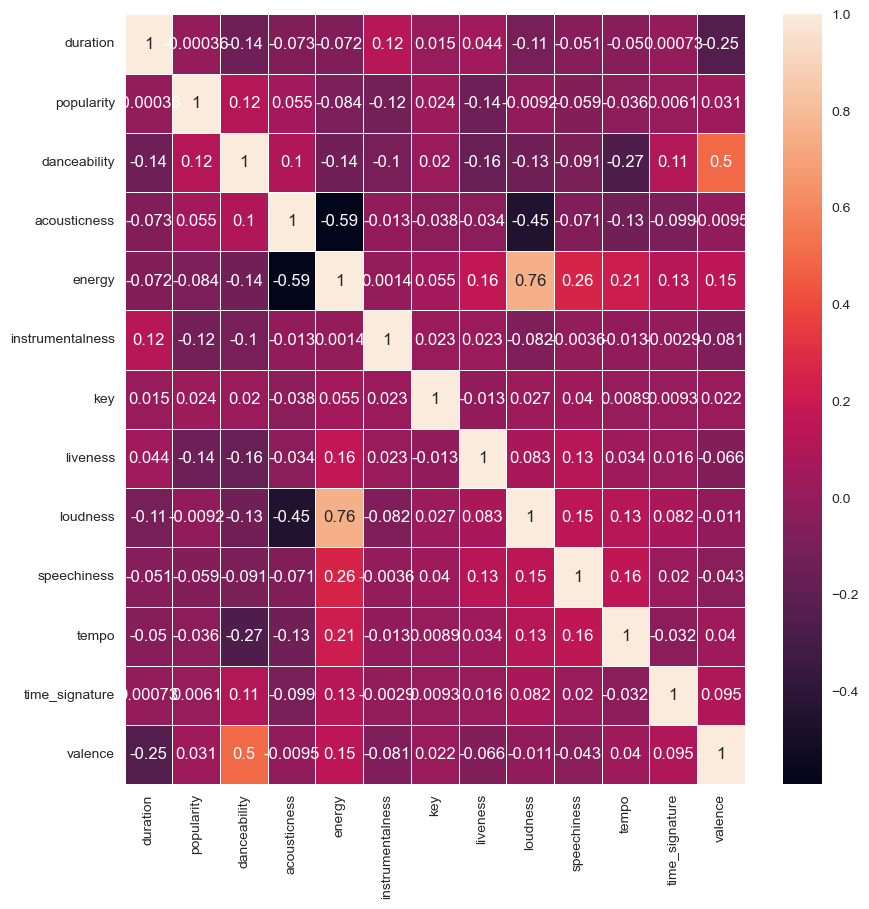

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True, linewidth = .5)
plt.show()

In [5]:
dataset.drop(['loudness'], axis=1, inplace=True)

In [6]:
scaler = RobustScaler()
dataset[dataset.columns] = scaler.fit_transform(dataset)
dataset

,duration,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,speechiness,tempo,time_signature,valence
name,,,,,,,,,,,,
Smells Like Teen Spirit,0.782609,1.000000,-0.065990,-0.185223,0.513333,-0.005909,-0.571429,-0.146396,0.474689,-0.188741,0.0,0.414873
Stairway to Heaven - Remaster,2.971014,1.181818,-0.898477,2.101652,-1.393333,0.172970,0.571429,-0.090090,-0.272199,-1.083025,0.0,-0.949772
Bohemian Rhapsody - Remastered 2011,1.420290,1.000000,-0.624365,0.950278,-1.186667,-0.016133,-0.714286,0.625000,0.381743,0.517819,0.0,-0.868885
Imagine - Remastered 2010,-0.594203,1.136364,0.162437,3.391033,-1.670000,10.798216,-0.714286,-0.216779,-0.560996,-1.257073,0.0,-1.022831
(I Can't Get No) Satisfaction - Mono Version,-0.173913,1.136364,1.055838,-0.034305,0.350000,1.857172,-0.428571,-0.022523,-0.275519,0.320325,0.0,0.965427
...,...,...,...,...,...,...,...,...,...,...,...,...
I'm In Your Mind,-0.282609,-0.227273,-1.111675,-0.162020,0.060000,47.318802,0.142857,2.618243,0.584232,-0.795212,0.0,-0.404436
Cellophane,-0.557971,-0.363636,-0.421320,-0.176925,0.430000,54.114704,0.285714,-0.067568,2.685477,-0.808654,0.0,-0.532290
Hot Water,-0.398551,-0.545455,0.568528,3.205710,-0.496667,52.578240,0.571429,-0.090090,-0.295436,-0.967671,0.0,0.451402


&nbsp;

In [7]:
pca = PCA(n_components=2)
dataset_pca = pca.fit(dataset).transform(dataset)

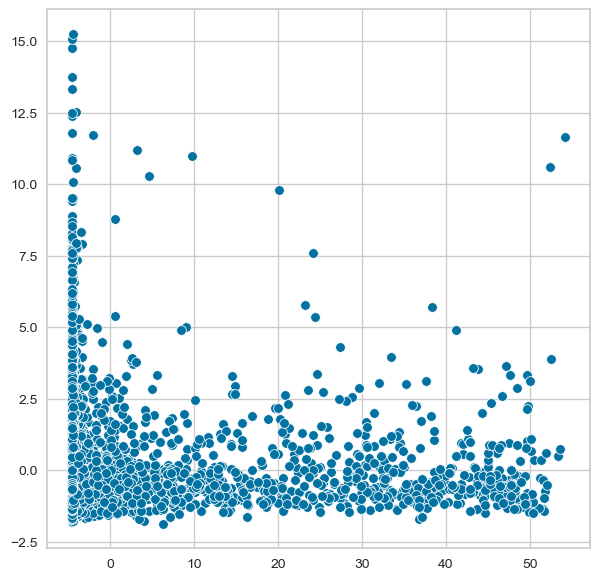

In [8]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x = dataset_pca[:, 0], y = dataset_pca[:, 1])
plt.show()

&nbsp;

## K-Means

Text(0, 0.5, 'SSE')

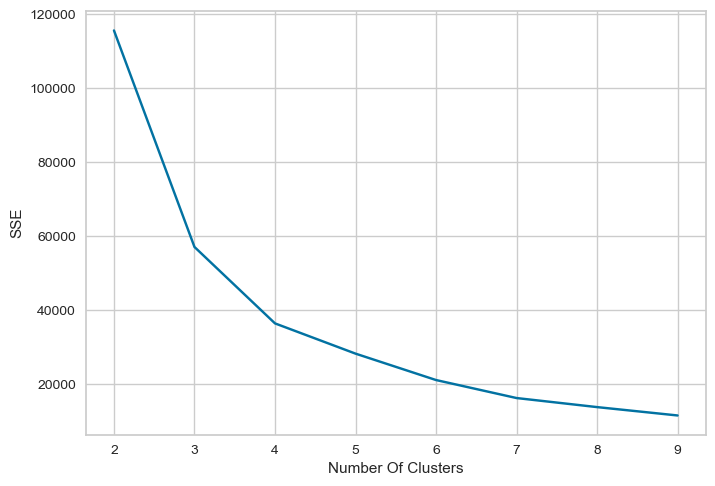

In [9]:
numClusters = range(2, 10)
SSE = []
silhouette_coefficients = []

for k in numClusters:
    kmeans = KMeans(n_clusters=k, max_iter=150, random_state=0)
    kmeans.fit(dataset_pca)
    SSE.append(kmeans.inertia_)
    
    if k<=1:
        continue;
    score = silhouette_score(dataset_pca, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(numClusters, SSE)
plt.xlabel('Number Of Clusters')
plt.ylabel('SSE')

In [10]:
kl = KneeLocator(range(2, 10), SSE, curve="convex", direction="decreasing")
kl.elbow

4

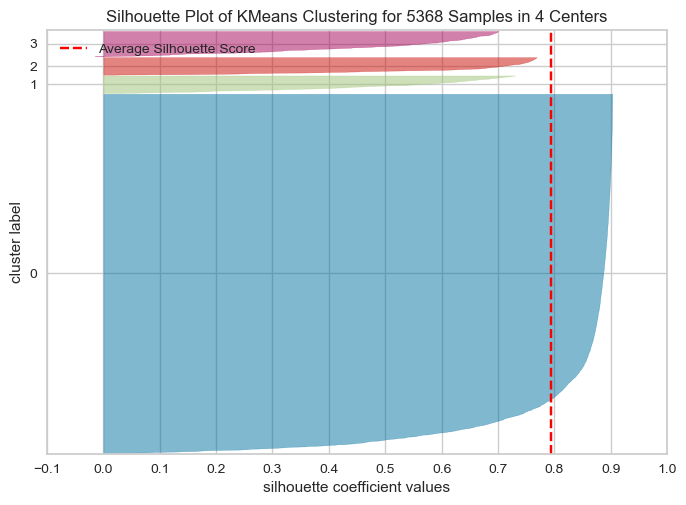

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 5368 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, random_state=42))

In [11]:
silhouette_visualizer(KMeans(4, random_state=42), dataset_pca, colors='yellowbrick')

In [12]:
data = pd.DataFrame(dataset_pca)

In [13]:
data

,0,1
0,-4.487975,-0.072447
1,-4.273358,-1.444530
2,-4.481649,-0.336974
3,6.299035,-1.870730
4,-2.647444,-0.818674
...,...,...
5363,42.845026,0.504624
5364,49.627469,2.151008
5365,48.081600,-1.337197
5366,35.257531,-0.464450


For n_clusters = 2 The average silhouette_score is : 0.8845979469183837
For n_clusters = 3 The average silhouette_score is : 0.8307274546926829
For n_clusters = 4 The average silhouette_score is : 0.7946919824648541
For n_clusters = 5 The average silhouette_score is : 0.7507610673339776


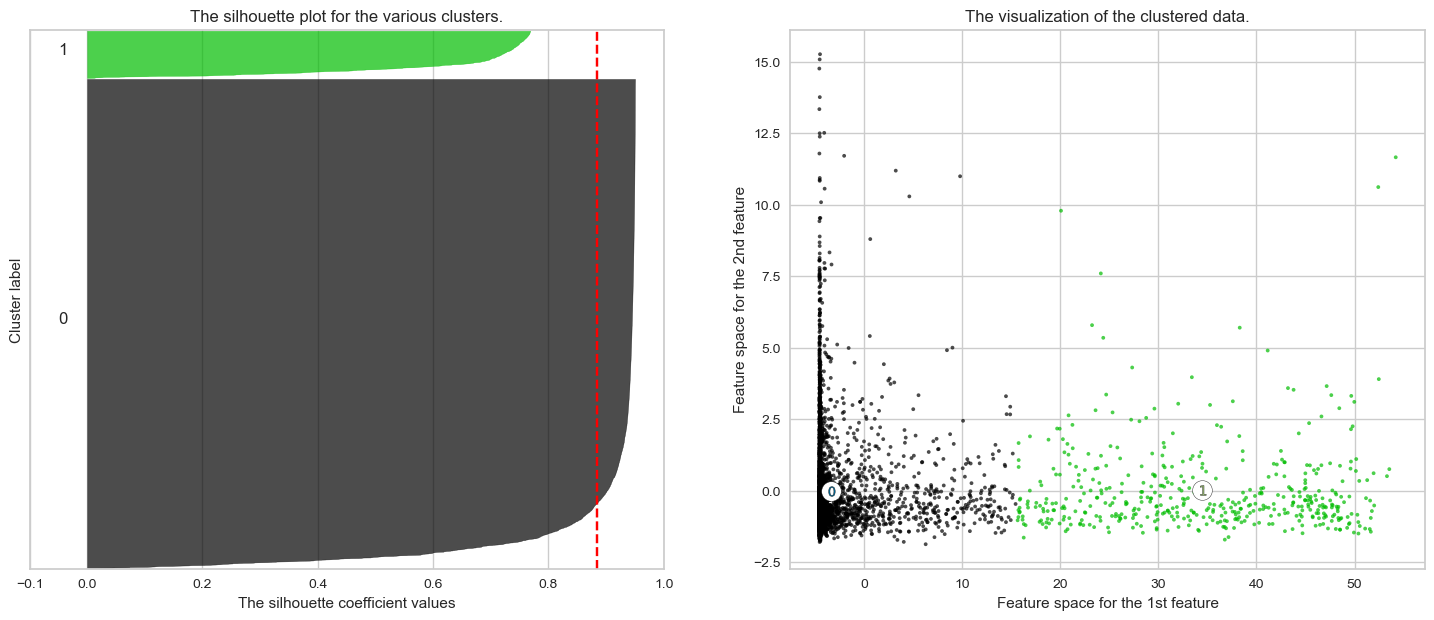

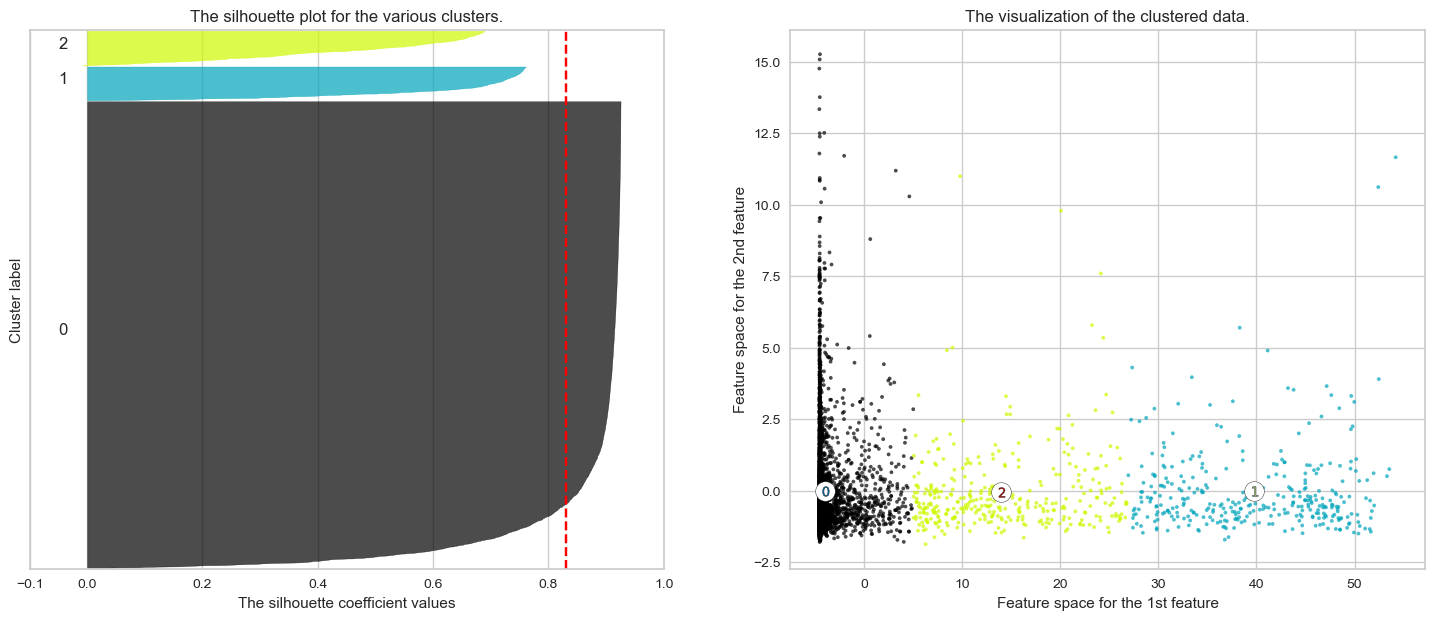

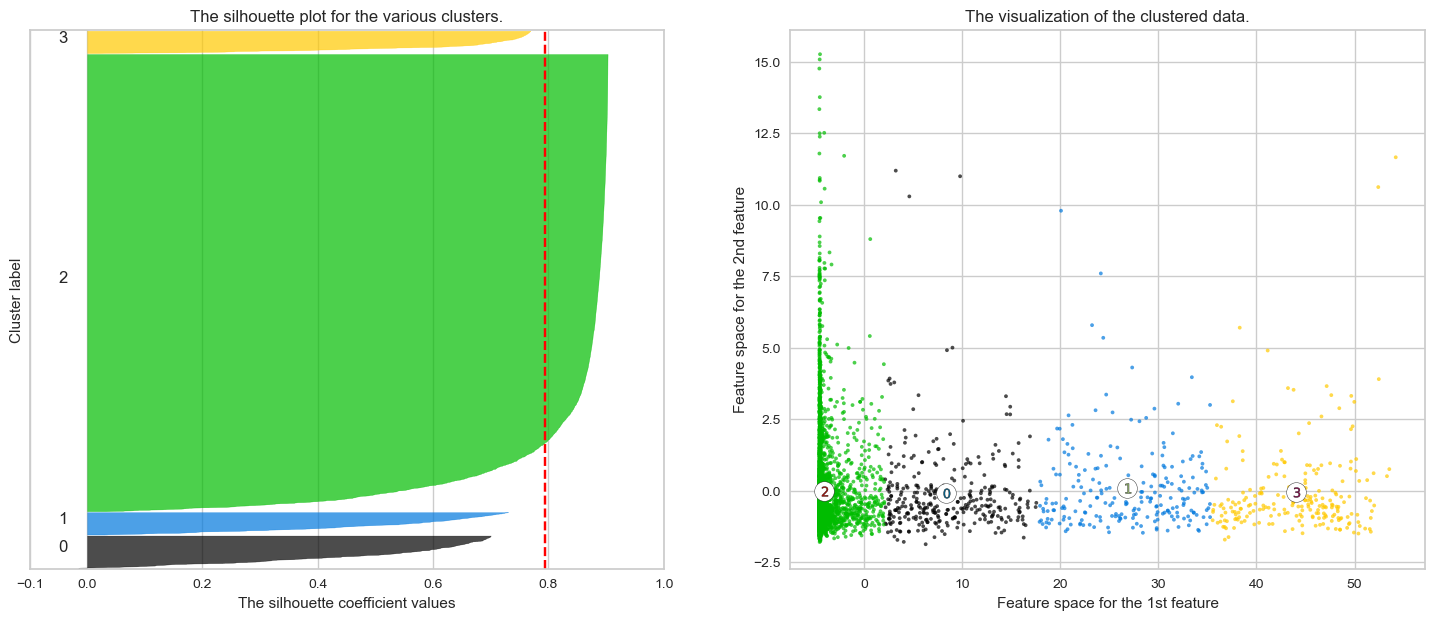

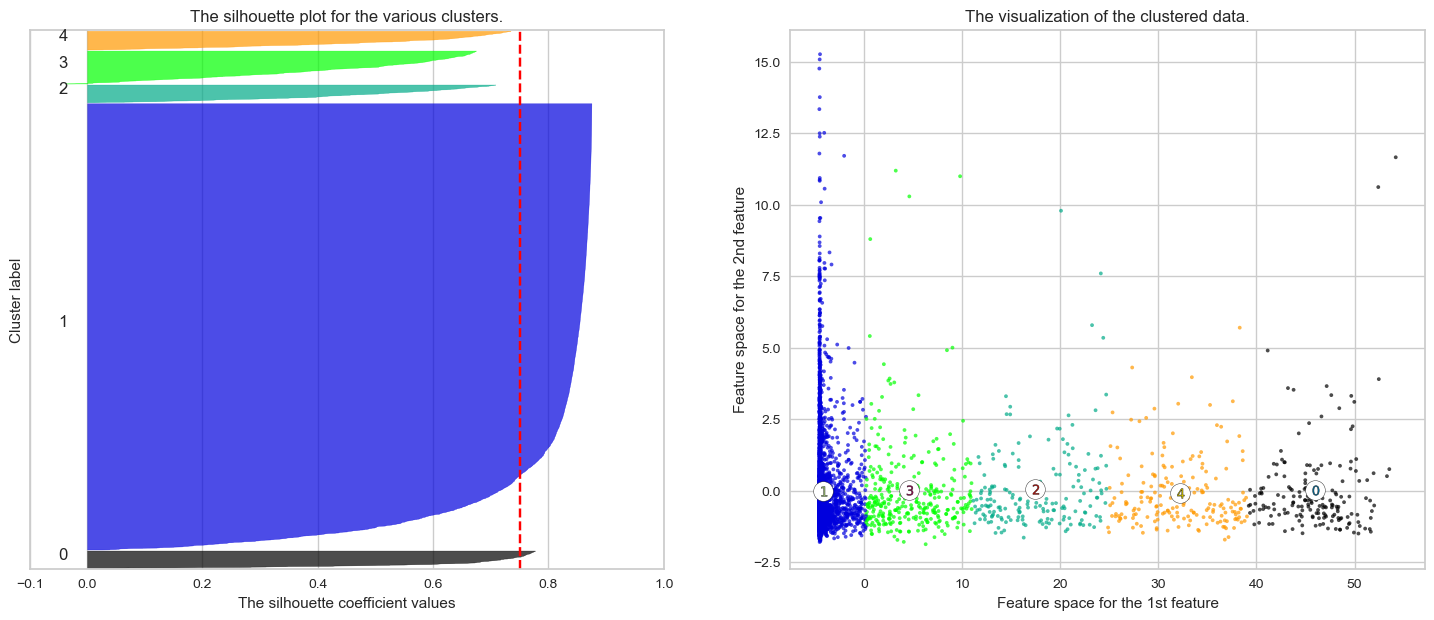

In [14]:
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)

    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =",n_clusters,
        "The average silhouette_score is :",silhouette_avg)

    sample_silhouette_values = silhouette_samples(dataset_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data[0], data[1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_

    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

plt.show()

In [15]:
def k_means(data, n_clusters):
    k_means = KMeans(n_clusters=n_clusters, max_iter=50, random_state=1)
    k_means.fit(data)
    labels = k_means.labels_
    centroids = k_means.cluster_centers_
    pd.DataFrame(centroids)
    
    sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels, c=labels, ax=plt.gca())
    sns.scatterplot(x=centroids[:,0], y=centroids[:,1], marker="*", color="m", s=500)
    plt.show()

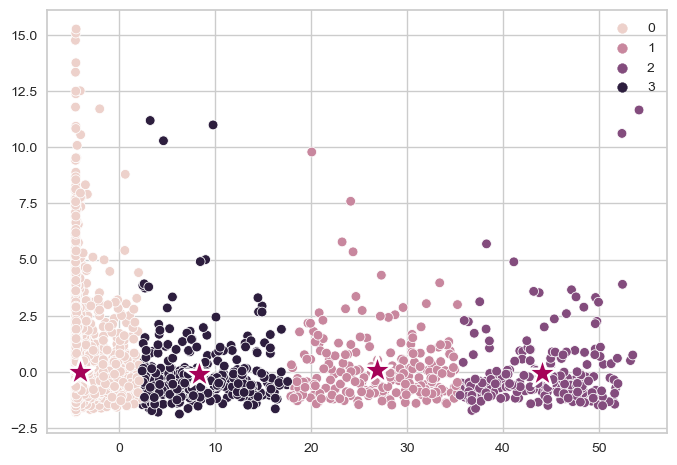

In [16]:
k_means(dataset_pca, 4)

In [17]:
silhouette_coefficients[2]

0.7948451335416757

&nbsp;

## Hierarchical (Agglomerative)

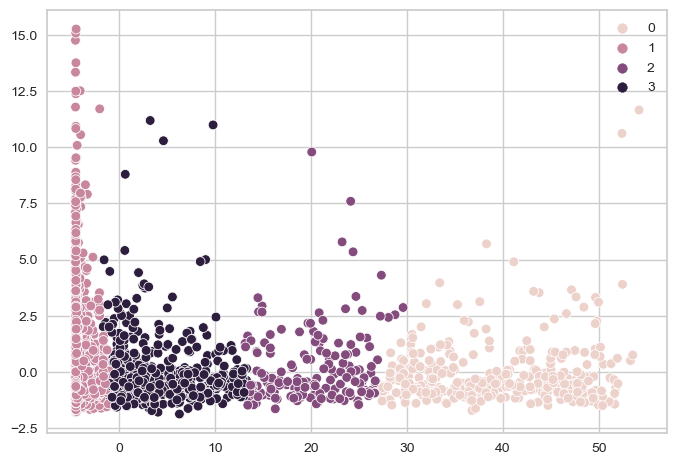

In [18]:
ac = AgglomerativeClustering(n_clusters=4).fit(dataset_pca)
sns.scatterplot(x=dataset_pca[:,0], y=dataset_pca[:,1], hue=ac.labels_)
plt.show()

&nbsp;

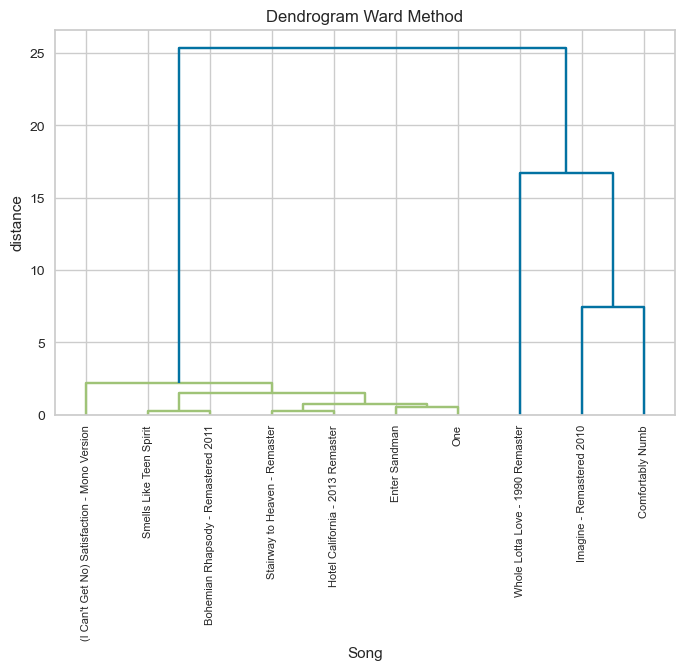

In [19]:
Z = linkage(dataset_pca[:10], 'ward')
fig = plt.figure(figsize=(8, 5))
plt.title('Dendrogram Ward Method')
plt.xlabel('Song')
plt.xticks(ticks = range(0, 10), labels=dataset.index[:10].tolist(), rotation=90)
plt.ylabel('distance')
dendrogram(Z, leaf_rotation=90., color_threshold=4, leaf_font_size=8., ax=plt.gca(), labels=dataset.index[:10].tolist())
plt.show()

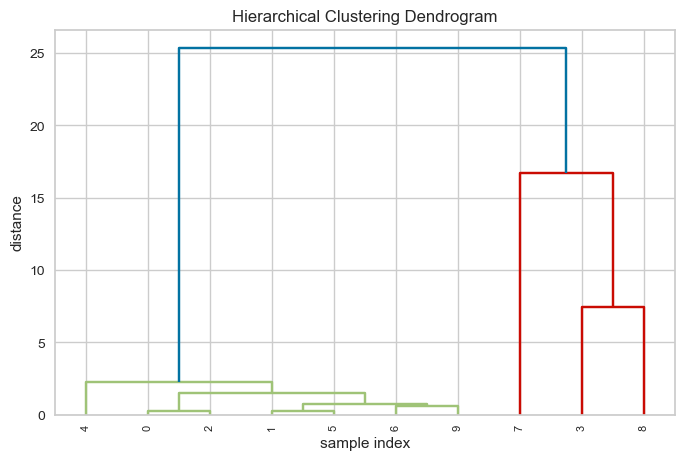

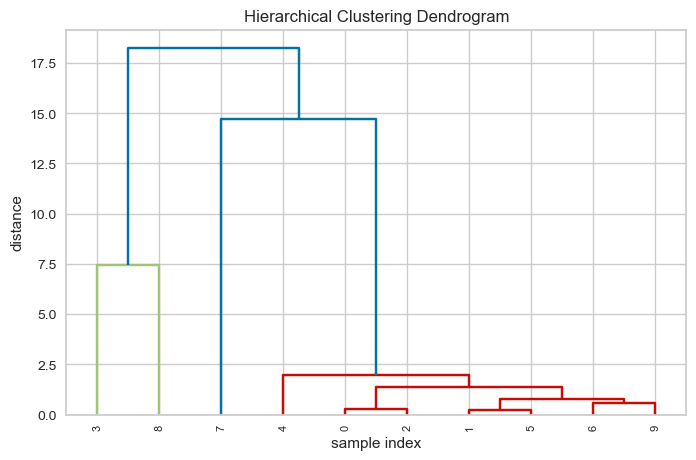

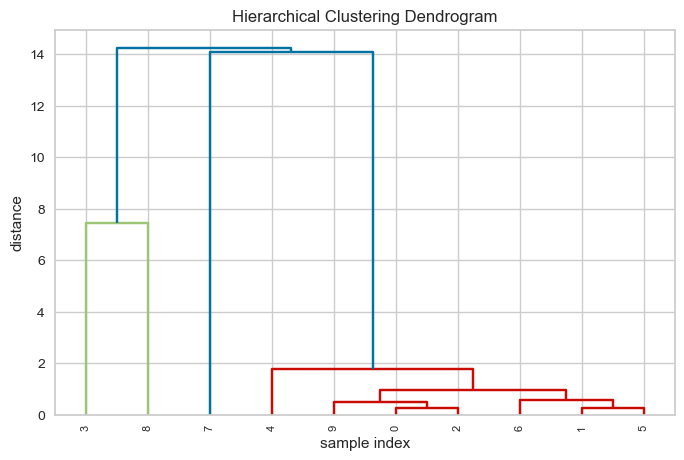

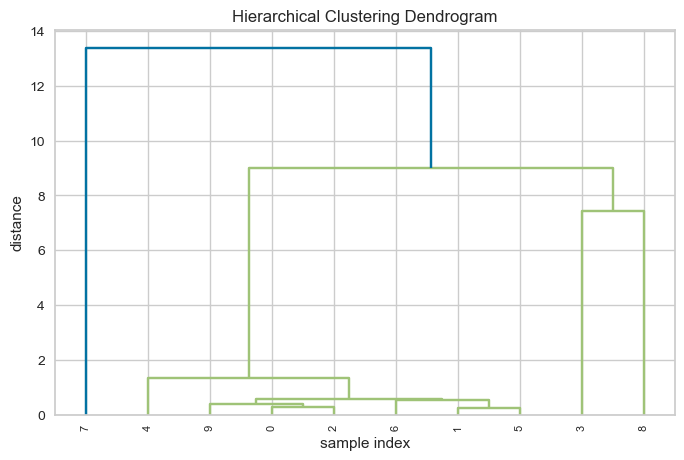

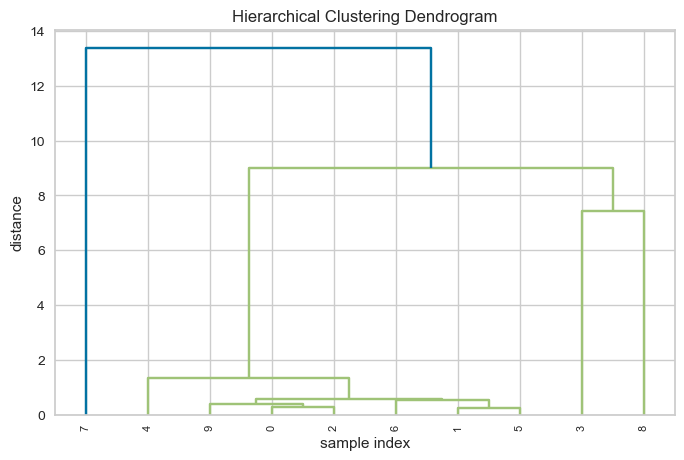

In [20]:
linkage_types = ['ward', 'complete', 'average', 'single']

for link_type in linkage_types:
    Z = linkage(dataset_pca[:10], link_type)
    plt.figure(figsize=(8, 5))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(Z, leaf_rotation=90., leaf_font_size=8.);
    plt.show();
    
plt.figure(figsize=(8, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8., truncate_mode='lastp');

&nbsp;

## DBSCAN

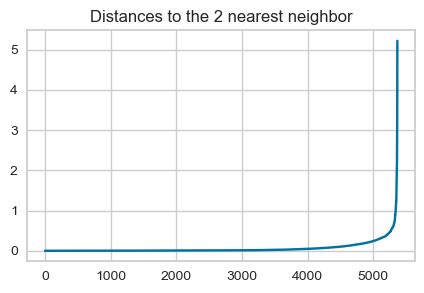

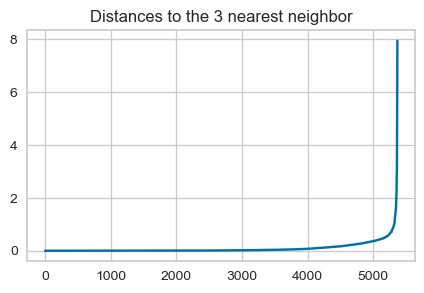

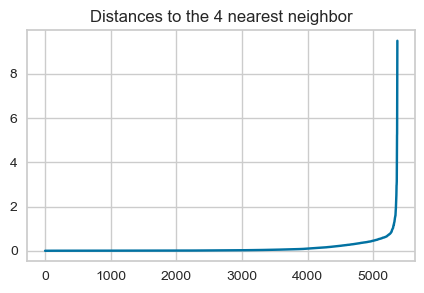

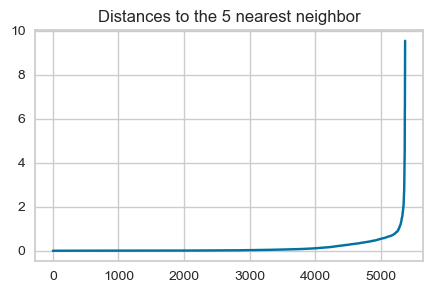

In [21]:
neighbors = [2, 3, 4, 5]
distances = []

for i in neighbors:
    neigh = NearestNeighbors(n_neighbors=i)
    nbrs = neigh.fit(dataset_pca)
    distances, indices = nbrs.kneighbors(dataset_pca)
    distances = np.sort(distances, axis=0)
    distances = distances[:, i-1]

    plt.figure(figsize=(5, 3))
    plt.plot(distances);
    plt.title('Distances to the ' + str(i) + ' nearest neighbor')
    plt.show()

In [22]:
db = DBSCAN(eps=0.1, min_samples=2).fit(dataset_pca)

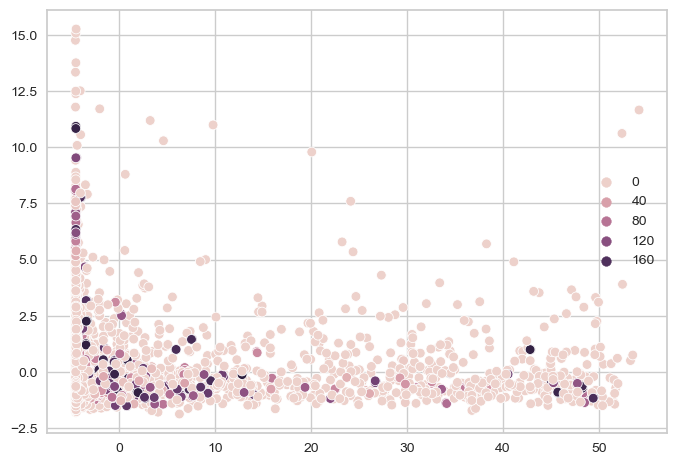

In [23]:
sns.scatterplot(x=dataset_pca[:,0], y=dataset_pca[:,1], hue=db.labels_)
plt.show()